In [2]:
#!/usr/bin/python

import sys
import os
import random
from math import *
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

###############################################################################
PLATE_ANGLE_MIN, PLATE_ANGLE_MAX = 0, 360
ARM1_ANGLE_MIN, ARM1_ANGLE_MAX = -90, 90
ARM2_ANGLE1_MIN, ARM2_ANGLE1_MAX = -90, 90
ARM2_ANGLE2_MIN, ARM2_ANGLE2_MAX = -90, 90

PLATE_INC = 36
ARM1_INC = 18
ARM2_INC1 = 18
ARM2_INC2 = 18

L1 = 160
L2 = 200
L3 = L1 + L2
###############################################################################

[[ 190.99  677.86]]


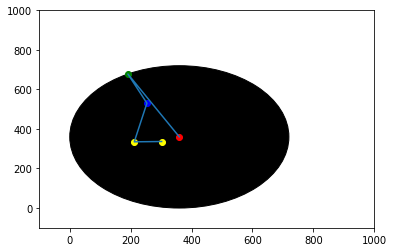

([211.92000000000002, 334.95000000000005], [301.89000000000004, 336.51], 118, 5, 35, 9, 26)


In [3]:
# returns translation matrix
def translate(s_pnt, d_pnt):
    return (np.subtract(d_pnt, s_pnt))

# returns the rotated point
def rotate(pnt, angle):
    radian = radians(angle)
    rot_m = np.matrix([  [cos(radian), -sin(radian)],
                        [sin(radian), cos(radian)]])
    res_m = np.matmul(rot_m, pnt.T)
    res_m = np.around(res_m, decimals=2)
    return (res_m.T)

def flip_x(pnt):
    return (np.multiply(pnt, [-1, 1]))

def flip_y(pnt):
    return (np.multiply(pnt, [1, -1]))

x1 = np.matrix([L3, 0])
arm_1 = np.matrix([L1, 0])
arm_2 = np.matrix([L2, 0])
shift_m = np.matrix([L3, L3])
x2 = np.matrix([0, 0])
        
# a1 = random.randint(PLATE_ANGLE_MIN, PLATE_ANGLE_MAX)
# a2 = random.randint(ARM1_ANGLE_MIN, ARM1_ANGLE_MAX)
# a3 = random.randint(ARM2_ANGLE1_MIN, ARM2_ANGLE1_MAX) + random.randint(ARM2_ANGLE2_MIN, ARM2_ANGLE2_MAX)

a1, a2, a3, a4 = 118, 5, 35, 9
pnt_x, pnt_y = [], []
stroke_list = []
if (True):
# for a1 in range(PLATE_ANGLE_MIN, PLATE_ANGLE_MAX, PLATE_INC):
    # Plate Rotation
    x1_rot = rotate(x1, a1)
    print_x1 = np.add(x1_rot, shift_m)
    print (print_x1)

    fig, ax = plt.subplots()
    plate = plt.Circle((360,360), L3, color='black', zorder=0)
    ax.add_artist(plate)
    list_np = [i.tolist() for i in np.hsplit(shift_m, 2)]
    pnt_x += list_np[0][0]
    pnt_y += list_np[1][0]
    ax.scatter(list_np[0][0], list_np[1][0], color='red')
    list_np = [i.tolist() for i in np.hsplit(print_x1, 2)]
    pnt_x += list_np[0][0]
    pnt_y += list_np[1][0]
    ax.scatter(list_np[0][0], list_np[1][0], color='green')
    
    if (True):
#     for a2 in range(ARM1_ANGLE_MIN, ARM1_ANGLE_MAX + 1, ARM1_INC):
        # Arm1 Rotation
        arm_1_rot = rotate(arm_1, a2)
        arm_1_rot = rotate(arm_1_rot, -a1)
        arm_1_rot = flip_x(arm_1_rot)

        arm_pnt = np.add(x2, x1_rot)
        arm_pnt = np.add(arm_pnt, arm_1_rot)

        print_arm = np.add(arm_pnt, shift_m)
        
        list_np = [i.tolist() for i in np.hsplit(print_arm, 2)]
        pnt_x += list_np[0][0]
        pnt_y += list_np[1][0]
        ax.scatter(list_np[0][0], list_np[1][0], color='blue')

        # Arm2 Rotation
        if (True):
            if (True):
#         for a3 in range(ARM2_ANGLE1_MIN, ARM2_ANGLE1_MAX + 1, ARM2_INC1):
#             for a4 in range(ARM2_ANGLE2_MIN, ARM2_ANGLE2_MAX + 1, ARM2_INC2):
                arm_2_rot_1 = rotate(arm_2, a3)
                arm_2_rot_1 = rotate(arm_2_rot_1, -a1)
                arm_2_rot_1 = rotate(arm_2_rot_1, a2)
                arm_2_rot_1 = flip_x(arm_2_rot_1)
                
                arm_2_rot_2 = rotate(arm_2, a4)
                arm_2_rot_2 = rotate(arm_2_rot_2, -a1)
                arm_2_rot_2 = rotate(arm_2_rot_2, a2)
                arm_2_rot_2 = flip_x(arm_2_rot_2)

                pen_pnt_1 = np.add(x2, x1_rot)
                pen_pnt_1 = np.add(pen_pnt_1, arm_1_rot)
                pen_pnt_2 = np.add(pen_pnt_1, arm_2_rot_2)
                pen_pnt_1 = np.add(pen_pnt_1, arm_2_rot_1)
                
                pen_pnt_1 = np.add(pen_pnt_1, shift_m)
                pen_pnt_2 = np.add(pen_pnt_2, shift_m)
#                 abs_val = abs(a3 - a4)
#                 print(a3 + a4)
                if (True):
#                 if (abs_val >= 30) and (abs_val <= 90):
                    stroke_list.append((pen_pnt_1.tolist()[0], pen_pnt_2.tolist()[0], a1, a2, a3, a4, a3 - a4))
    list_np = [i.tolist() for i in np.hsplit(pen_pnt_1, 2)]
    pnt_x += list_np[0][0]
    pnt_y += list_np[1][0]
    ax.scatter(list_np[0][0], list_np[1][0], color='yellow')
    list_np = [i.tolist() for i in np.hsplit(pen_pnt_2, 2)]
    pnt_x += list_np[0][0]
    pnt_y += list_np[1][0]
    ax.scatter(list_np[0][0], list_np[1][0], color='yellow')

    ax.plot(pnt_x, pnt_y)
    plt.xlim(-100, 1000)
    plt.ylim(-100, 1000)
    plt.show()

for i in stroke_list:
    print (i)